# **Importing Libraries**

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
data_url = "https://drive.google.com/uc?export=download&id=13LvcBrnbPzzaf0ueQPLlsq0l80oyPFsk"
df = pd.read_csv(data_url)
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Dataset Description**

In [19]:
df.shape

(303, 14)

In [20]:
df.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Exploratory Data Analysis**

In [21]:
print(df.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')


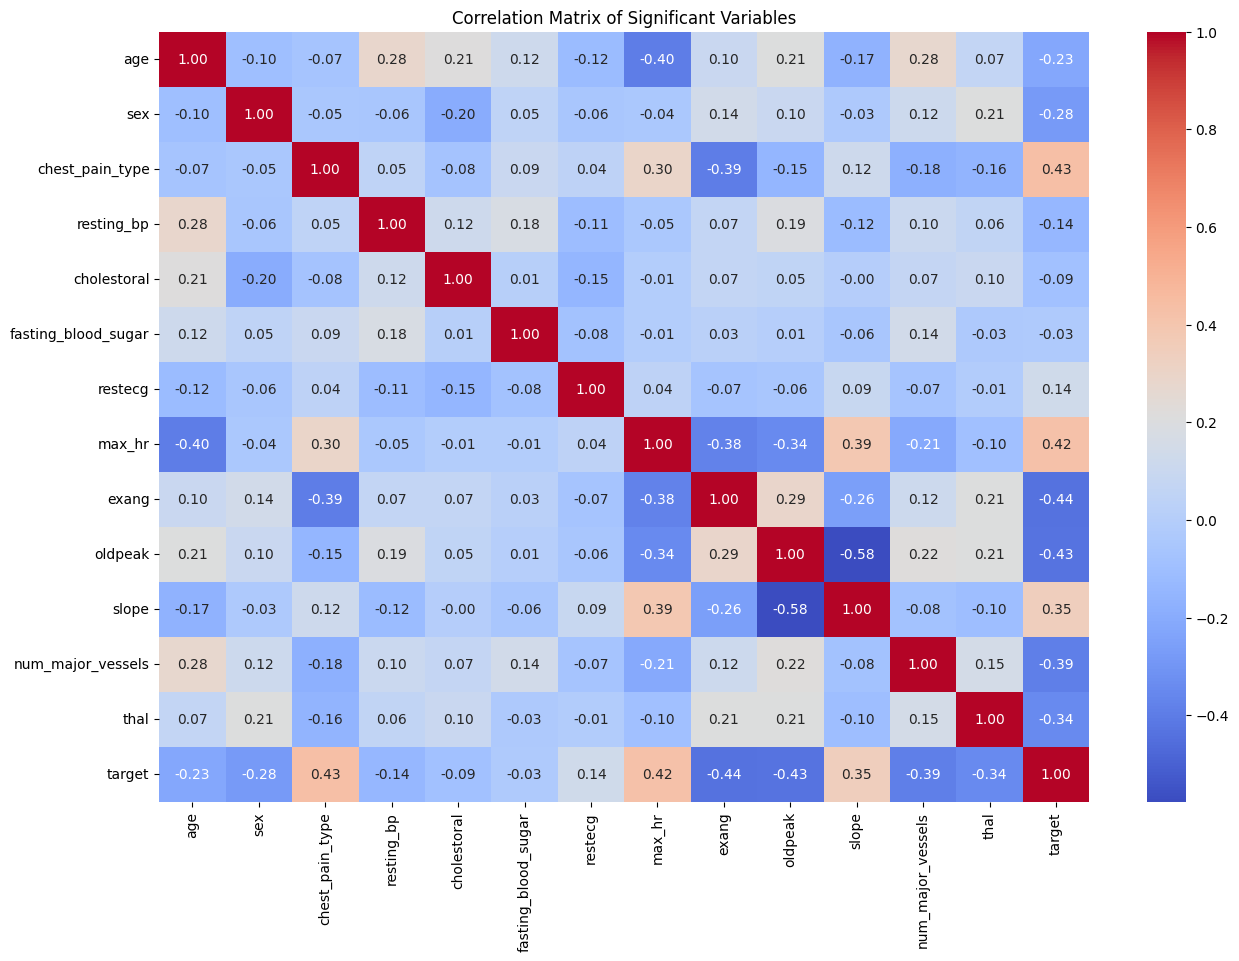

In [22]:
eda_columns = [
    'age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'
]

# Extract relevant data
eda_data = df[eda_columns]

# Generate summary statistics
summary_stats = eda_data.describe()

# Compute correlation matrix
correlation_matrix = eda_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Significant Variables')
plt.show()

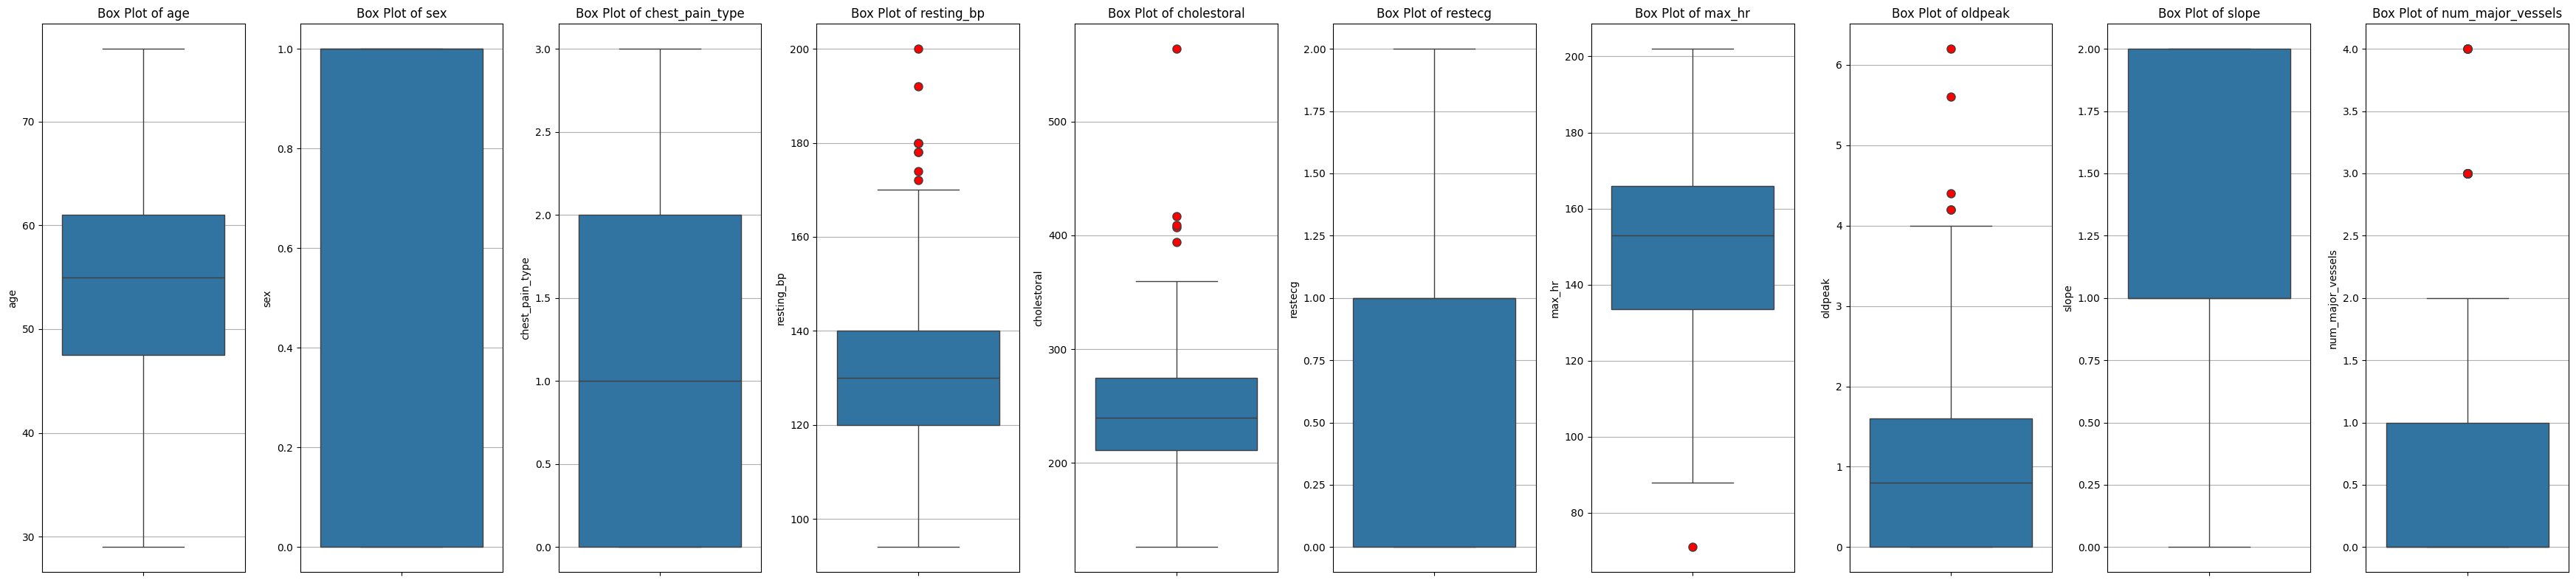

In [23]:
eda_columns = [
   'age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
        'restecg', 'max_hr',  'oldpeak', 'slope',
       'num_major_vessels'
]

plt.figure(figsize=(35, 8))

for i, column in enumerate(eda_columns, 1):
    plt.subplot(1, len(eda_columns), i)

    # Ensure the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.boxplot(y=df[column], flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
    else:
        print(f"Column {column} is not numeric. Skipping box plot.")

    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [24]:
# Identify and remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter the data
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Example usage
numeric_columns = ['resting_bp', 'cholestoral', 'max_hr', 'oldpeak','num_major_vessels']
df_cleaned = remove_outliers_iqr(df, numeric_columns)


In [25]:
df = df_cleaned

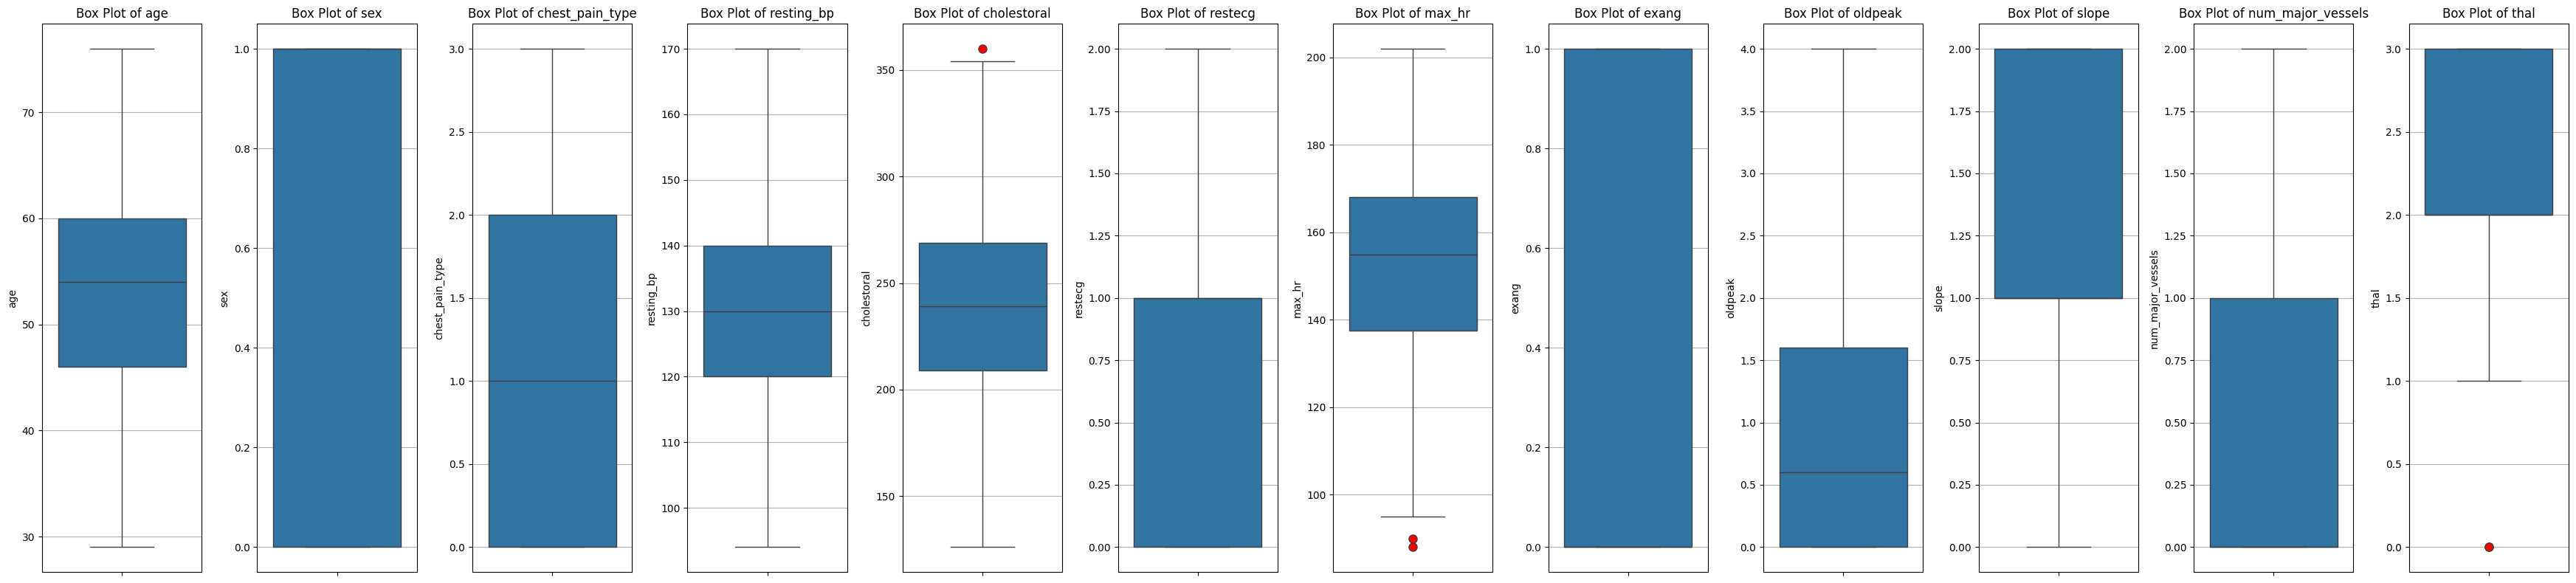

In [26]:
eda_columns = [
   'age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
        'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal'
]

plt.figure(figsize=(35, 8))

for i, column in enumerate(eda_columns, 1):
    plt.subplot(1, len(eda_columns), i)

    # Ensure the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.boxplot(y=df[column], flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
    else:
        print(f"Column {column} is not numeric. Skipping box plot.")

    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [27]:
#checking null values
df.isna().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_bp,0
cholestoral,0
fasting_blood_sugar,0
restecg,0
max_hr,0
exang,0
oldpeak,0


In [28]:
#unique values
df.nunique()

,0
age,40
sex,2
chest_pain_type,4
resting_bp,41
cholestoral,142
fasting_blood_sugar,2
restecg,3
max_hr,86
exang,2
oldpeak,36


In [29]:
#duplicate values
df.duplicated().sum()

0

In [30]:
#selecting columns with object datatypes
string_columns = df.select_dtypes(include=['object'])
string_columns.head()

""
0
1
2
3
4


# **Model Implementation**

In [31]:
data= df

In [32]:
X = data.drop('target' , axis=1)
y = data['target']

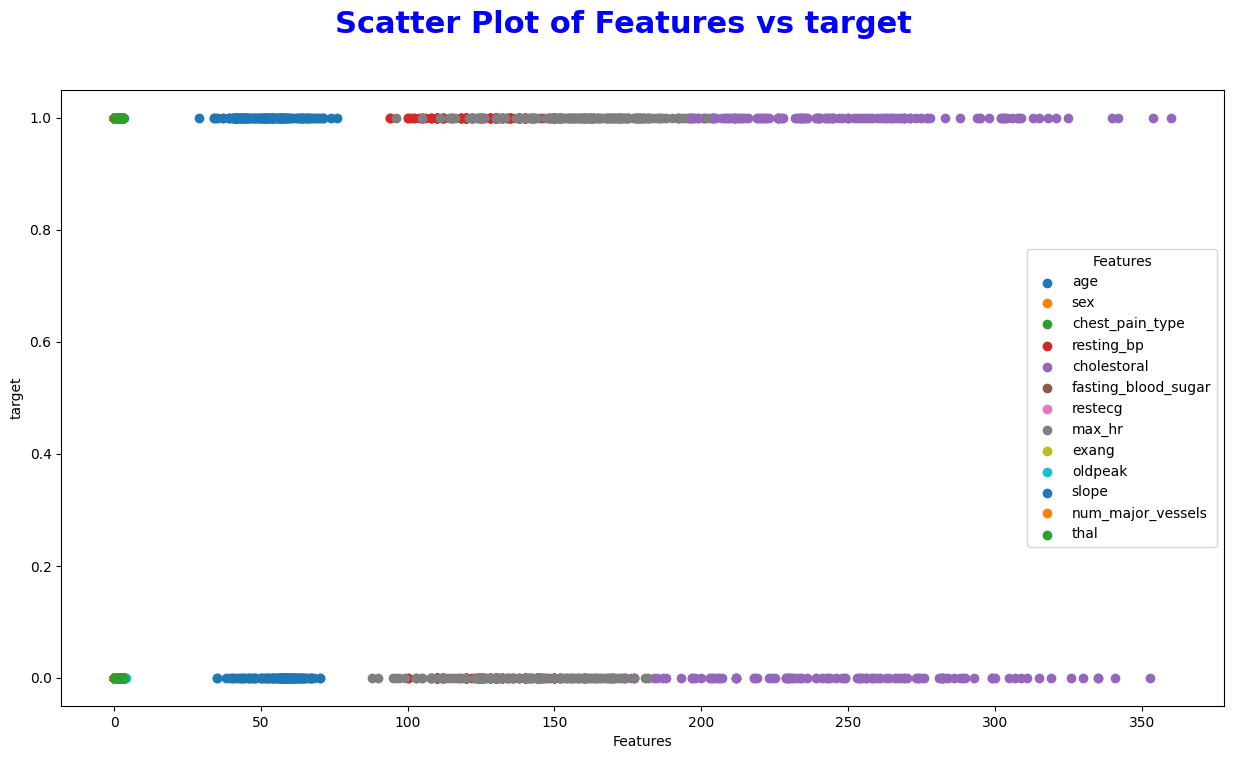

In [35]:
features = X
fig, ax = plt.subplots(figsize=(15, 8))

# Loop over each feature and plot
for feature in features:
    ax.scatter(x=data[feature], y=data["target"], label=feature)

# Set labels, limits, and ticks
ax.set(xlabel="Features", ylabel="target")

# Customize the plot
ax.legend(title="Features")

ax.yaxis.get_major_ticks()[0].label1.set_visible(False)

fig.suptitle(t="Scatter Plot of Features vs target",
             color="blue",
             fontsize=22,
             fontweight="bold")

# Display the plot
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((210, 13), (53, 13), (210,), (53,))

In [44]:
# Create a model
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# Train the model
epoch_number=200
history = model.fit(X_train, y_train, epochs=epoch_number )

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5094 - loss: 2.0273
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5864 - loss: 0.8876 
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6021 - loss: 0.8967 
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5517 - loss: 0.8260 
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6636 - loss: 0.6373 
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6332 - loss: 0.6239  
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6103 - loss: 0.7559 
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6393 - loss: 0.6889 
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5790 - loss: 0.9222 
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6338 - loss: 0.7150 
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6681 - loss: 0.6782  
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6631 - lo

In [45]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,341 (118.52 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,228 (79.02 KB)

# **Model Evaluation**

In [46]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7553 - loss: 0.4283 


[0.41690537333488464, 0.7735849022865295]

In [47]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [48]:
y_pred[:5]

array([[9.4428611e-01],
       [4.9059209e-01],
       [6.0955966e-01],
       [3.7041694e-04],
       [9.0345204e-01]], dtype=float32)

In [49]:
y_test[:5]

,target
125,1
130,1
299,0
262,0
69,1


In [50]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
print("Precision : ", precision.result().numpy())

Precision :  0.92


In [51]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
print("Recall : ", recall.result().numpy())

Recall :  0.6969697


In [52]:
history.history

{'accuracy': [0.49047619104385376,
  0.5904762148857117,
  0.6000000238418579,
  0.5761904716491699,
  0.6428571343421936,
  0.6047618985176086,
  0.6047618985176086,
  0.6047618985176086,
  0.5904762148857117,
  0.6380952596664429,
  0.6904761791229248,
  0.6714285612106323,
  0.7523809671401978,
  0.761904776096344,
  0.699999988079071,
  0.6952381134033203,
  0.7333333492279053,
  0.7047619223594666,
  0.7190476059913635,
  0.761904776096344,
  0.6619047522544861,
  0.7809523940086365,
  0.7809523940086365,
  0.7714285850524902,
  0.7714285850524902,
  0.8047618865966797,
  0.7857142686843872,
  0.7857142686843872,
  0.6714285612106323,
  0.7666666507720947,
  0.738095223903656,
  0.6857143044471741,
  0.6428571343421936,
  0.6619047522544861,
  0.7047619223594666,
  0.776190459728241,
  0.7857142686843872,
  0.8238095045089722,
  0.8142856955528259,
  0.8095238208770752,
  0.8095238208770752,
  0.8238095045089722,
  0.8142856955528259,
  0.7952380776405334,
  0.7333333492279053,
  

Text(0.5, 0, 'epochs')

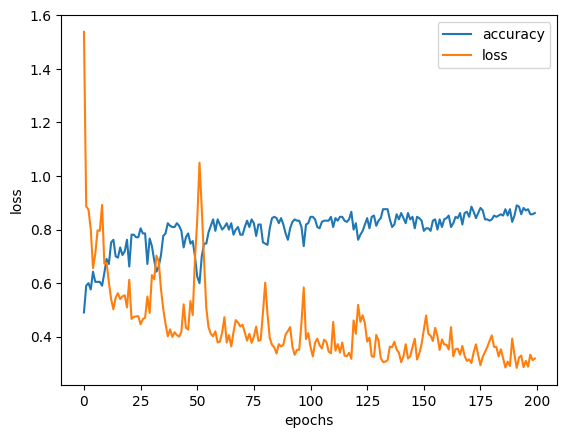

In [56]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')